# Interval-related Analysis


This example shows how to use NeuroKit to analyze longer periods of data (i.e., greater than 10 seconds) such as resting state data. 

In [39]:
# This "decorative" cell should be hidden from the docs once this is implemented:
# https://github.com/microsoft/vscode-jupyter/issues/1182 
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

The Dataset

First, download the dataset located on the GitHub repository.

It contains 5 minutes of physiological signals recorded at a frequency of 100Hz (5 x 60 x 100 = 30000 data points).

It contains the following signals : ECG, PPG, RSP


In [40]:
# Get data
data = nk.data("bio_resting_5min_100hz")

This is the resting state data from 1 participant who was asked to close his/her eyes for 8 minutes, trying not to think of anything as well as not to fall asleep.

# Process the Signals

In this analysis here, we will focus on extracting ECG and RSP features. To process the respective physiological signals, you can use ecg_process() and rsp_process(). You can then then visualize these signals using ecg_plot() and rsp_plot(). For the purposes of these example, we will select just 3000 datapoints (or 30s) to visualize.

Note: Do remember to specify the correct sampling_rate (in this case, to 100Hz) in which the signals were generated, in all the relevant functions.

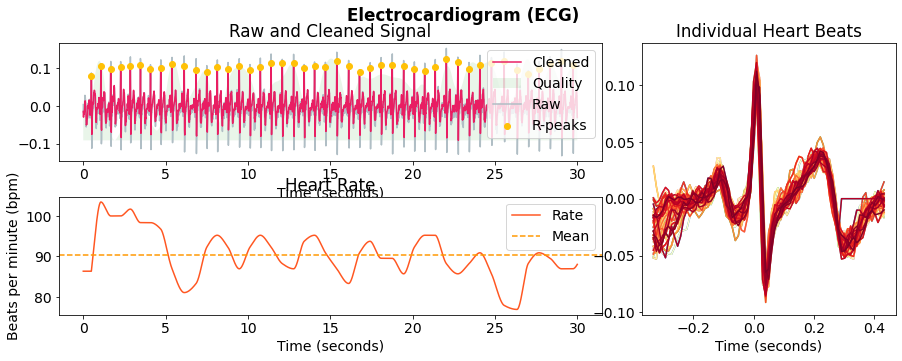

In [41]:
# Process ecg
ecg_signals, info = nk.ecg_process(data["ECG"], sampling_rate=100)

nk.ecg_plot(ecg_signals[:3000], sampling_rate=100)

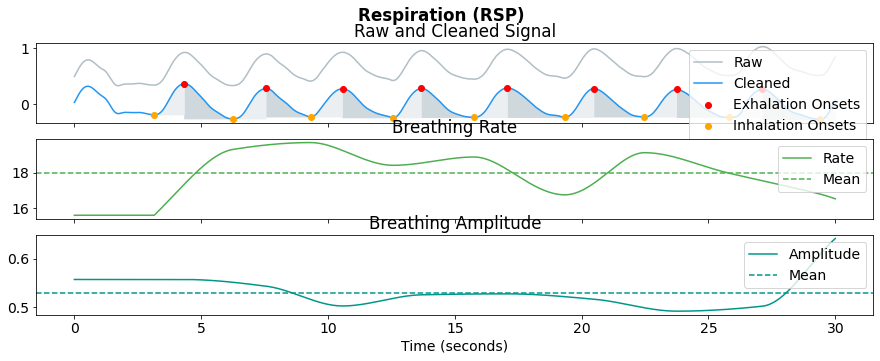

In [42]:
# Process rsp
rsp_signals, info = nk.rsp_process(data["RSP"], sampling_rate=100)

nk.rsp_plot(rsp_signals[:3000], sampling_rate=100)

# Extract Features

Now that we have the processed signals, we can now perform the analysis using ecg_intervalrelated() and rsp_intervalrelated(). Simply provide the processed dataframe and these functions will return a dataframe of the features pertaining to the specific signal.

These features will be quite different from event-related features (See Event-related analysis example) as these signals were generated over a longer period of time. Hence, apart from the mean signal rate, variability metrices pertaining to heart rate variability (HRV) and respiratory rate variability (RRV) are also extracted here.

In [43]:
nk.ecg_intervalrelated(ecg_signals)


,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,86.392105,69.475638,4.903604,NaN,NaN,NaN,NaN,NaN,NaN,3.883777,...,1.978637,4.256941,1.268694,1.404138,1.469801,2.57268,1.562676,1.846507,2.722348,0.873124


In [44]:
nk.rsp_intervalrelated(rsp_signals)


,RSP_Rate_Mean,RSP_Amplitude_Mean,RSP_Phase_Duration_Inspiration,RSP_Phase_Duration_Expiration,RSP_Phase_Duration_Ratio,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,...,RRV_SampEn,RRV_DFA_alpha2,RRV_MFDFA_alpha2_Width,RRV_MFDFA_alpha2_Peak,RRV_MFDFA_alpha2_Mean,RRV_MFDFA_alpha2_Max,RRV_MFDFA_alpha2_Delta,RRV_MFDFA_alpha2_Asymmetry,RRV_MFDFA_alpha2_Fluctuation,RRV_MFDFA_alpha2_Increment
0,15.860331,0.399077,0.152429,0.229395,0.664482,134.651105,384.039474,102.06409,135.551343,0.265765,...,1.181133,0.640757,1.363461,0.865082,0.935103,-0.257694,-0.281358,-0.448644,0.000188,0.093669


# Optional: Segmenting the Data

If you want to segment your data for analysis, such as analyzing two separate portions of your resting state data, you can simply do so by splitting the ecg_signals dataframe into epochs using epochs_create(). Using this example dataset, let’s say you want to analyze the first half and the second half of the ECG data. This means that each halved data would last for 60 x 2.5s = 150s.

In this function, we would also specify the onset of events to be at the 0th (for the first half of the data) and the 15000th datapoint (for the second half of the data), since there are 30000 data points in total.

In [45]:
# Half the data
epochs = nk.epochs_create(ecg_signals, 
                          events=[0, 15000], 
                          sampling_rate=100, 
                          epochs_start=0, 
                          epochs_end=150)

C:\Users\Azzy\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


This returns a dictionary of 2 processed ECG dataframes, which you can then enter into ecg_intervalrelated().

In [46]:
# Analyze
nk.ecg_intervalrelated(epochs)

,Label,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
1,1,86.389814,69.497674,5.167181,NaN,NaN,NaN,NaN,NaN,NaN,...,1.252763,4.290505,1.166763,1.323430,1.334030,1.573050,1.653578,1.803504,2.33683,0.828876
2,2,86.394396,69.460465,4.648090,NaN,NaN,NaN,NaN,NaN,NaN,...,1.881786,4.080222,1.347346,1.737149,1.497679,1.957806,1.536938,1.895279,3.09411,0.973029


This then returns a dataframe of the analyzed features, with the rows representing the respective segmented signals. Try doing this with your own signals!